# Simple Statistics

## Import Data

In [11]:
# Imports 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Import the csv files that are in the csv folder and save them into dataframes
damallsvenskan2018_df = pd.read_csv('csv/damallsvenskan2018.csv')
damallsvenskan2019_df = pd.read_csv('csv/damallsvenskan2019.csv')
damallsvenskan2020_df = pd.read_csv('csv/damallsvenskan2020.csv')
damallsvenskan2021_df = pd.read_csv('csv/damallsvenskan2021.csv')
damallsvenskan2022_df = pd.read_csv('csv/damallsvenskan2022.csv')

allsvenskan2018_df = pd.read_csv('csv/allsvenskan2018.csv')
allsvenskan2019_df = pd.read_csv('csv/allsvenskan2019.csv')
allsvenskan2020_df = pd.read_csv('csv/allsvenskan2020.csv')
allsvenskan2021_df = pd.read_csv('csv/allsvenskan2021.csv')
allsvenskan2022_df = pd.read_csv('csv/allsvenskan2022.csv')

## Simple Statistics

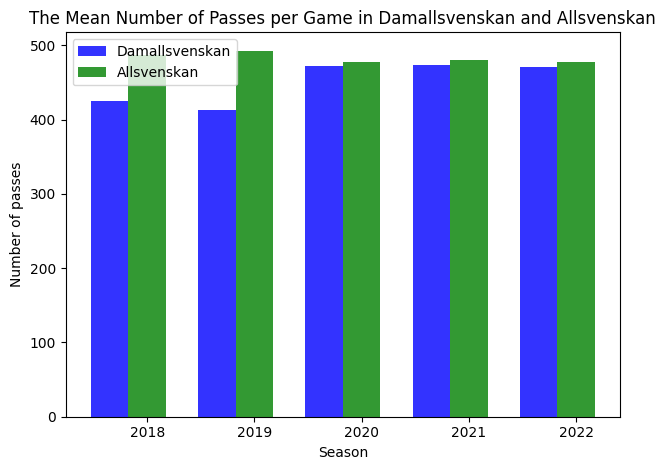

In [16]:
# Count the number of passes in total for all teams for each season
# The create a bar plot for each season, comparing allsvenskan to damallsvenskan for each year

pass_count_damallsvenskan2018 =  damallsvenskan2018_df[damallsvenskan2018_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2018_df[damallsvenskan2018_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2018 = allsvenskan2018_df[allsvenskan2018_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2018_df[allsvenskan2018_df['action'] == 'Pass inaccurate'].shape[0]

pass_count_damallsvenskan2019 =  damallsvenskan2019_df[damallsvenskan2019_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2019_df[damallsvenskan2019_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2019 = allsvenskan2019_df[allsvenskan2019_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2019_df[allsvenskan2019_df['action'] == 'Pass inaccurate'].shape[0]

pass_count_damallsvenskan2020 =  damallsvenskan2020_df[damallsvenskan2020_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2020_df[damallsvenskan2020_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2020 = allsvenskan2020_df[allsvenskan2020_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2020_df[allsvenskan2020_df['action'] == 'Pass inaccurate'].shape[0]

pass_count_damallsvenskan2021 =  damallsvenskan2021_df[damallsvenskan2021_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2021_df[damallsvenskan2021_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2021 = allsvenskan2021_df[allsvenskan2021_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2021_df[allsvenskan2021_df['action'] == 'Pass inaccurate'].shape[0]

pass_count_damallsvenskan2022 =  damallsvenskan2022_df[damallsvenskan2022_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2022_df[damallsvenskan2022_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2022 = allsvenskan2022_df[allsvenskan2022_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2022_df[allsvenskan2022_df['action'] == 'Pass inaccurate'].shape[0]

# Since the women play less games each season we need to normalize the data by dividing the total number of passes by the number of games played
pass_count_damallsvenskan2018 = pass_count_damallsvenskan2018 / 264
pass_count_allsvenskan2018 = pass_count_allsvenskan2018 / 480

pass_count_damallsvenskan2019 = pass_count_damallsvenskan2019 / 264
pass_count_allsvenskan2019 = pass_count_allsvenskan2019 / 480

pass_count_damallsvenskan2020 = pass_count_damallsvenskan2020 / 264
pass_count_allsvenskan2020 = pass_count_allsvenskan2020 / 480

pass_count_damallsvenskan2021 = pass_count_damallsvenskan2021 / 264
pass_count_allsvenskan2021 = pass_count_allsvenskan2021 / 480

pass_count_damallsvenskan2022 = pass_count_damallsvenskan2022 / 364
pass_count_allsvenskan2022 = pass_count_allsvenskan2022 / 480

# Data to plot
n_groups = 5
damallsvenskan = (pass_count_damallsvenskan2018, pass_count_damallsvenskan2019, pass_count_damallsvenskan2020, pass_count_damallsvenskan2021, pass_count_damallsvenskan2022)
allsvenskan = (pass_count_allsvenskan2018, pass_count_allsvenskan2019, pass_count_allsvenskan2020, pass_count_allsvenskan2021, pass_count_allsvenskan2022)

# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, damallsvenskan, bar_width,
                alpha=opacity,
                color='b',
                label='Damallsvenskan')

rects2 = plt.bar(index + bar_width, allsvenskan, bar_width,    
                alpha=opacity,
                color='g',
                label='Allsvenskan')

plt.xlabel('Season')
plt.ylabel('Number of passes')
plt.title('The Mean Number of Passes per Game in Damallsvenskan and Allsvenskan')
plt.xticks(index + bar_width, ('2018', '2019', '2020', '2021', '2022'))
plt.legend()
plt.tight_layout()
plt.show()